## 각각의 train data를 100, 50, 10 으로 변경시켜가며 같은 test data set을 비교하는 과제

In [43]:
import numpy as np
import matplotlib as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris_dataset = load_iris()

# dataset key값 확인
print("iris_dataset의 key: {}".format(iris_dataset.keys()))

print(iris_dataset['feature_names'])

iris_dataset의 key: dict_keys(['filename', 'target_names', 'DESCR', 'feature_names', 'target', 'data'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# 사용할 test set 생성하기

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))
print(X_test)
print(y_test)

X_test 크기: (38, 4)
y_test 크기: (38,)
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


# 학습데이터 100 테스트데이터 50

In [45]:
#trin 100, test 50

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    iris_dataset['data'], iris_dataset['target'], train_size=100, test_size=50, random_state=0)

print("X_train 크기: {}".format(X_train_1.shape))
print("y_train 크기: {}".format(y_train_1.shape))

print("X_test 크기: {}".format(X_test_1.shape))
print("y_test 크기: {}".format(y_test_1.shape))
print(y_test_1)
print(y_train_1)

X_train 크기: (100, 4)
y_train 크기: (100,)
X_test 크기: (50, 4)
y_test 크기: (50,)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001473D9E9358>,
      dtype=object)

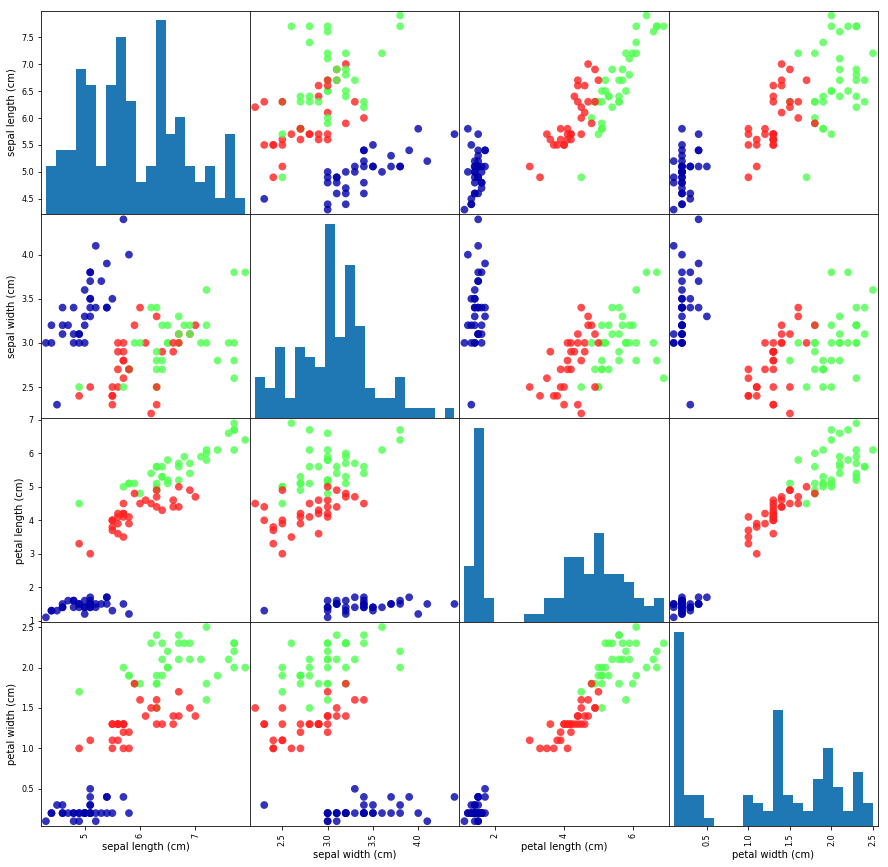

In [46]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train_1, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train_1, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_1, y_train_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [48]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']


# 따로 뽑은 test data

In [49]:
y_pred_1 = knn.predict(X_test_1)
print("테스트 세트에 대한 출력값:\n {}".format(y_test_1))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred_1))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred_1 == y_test_1)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test_1, y_test_1)))

테스트 세트에 대한 출력값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2]
테스트 세트의 정확도: 0.96
테스트 세트의 정확도: 0.96


# 공통 test data

In [50]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도: 0.97
테스트 세트의 정확도: 0.97


# 학습데이터 50 테스트데이터 100

In [51]:
#trin 100, test 50
# X 입력 데이터 2차원, y 출력레이블 1차원
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    iris_dataset['data'], iris_dataset['target'], train_size=50, test_size=100, random_state=1)

print("X_train 크기: {}".format(X_train_2.shape))
print("y_train 크기: {}".format(y_train_2.shape))

print("X_test 크기: {}".format(X_test_2.shape))
print("y_test 크기: {}".format(y_test_2.shape))
print(y_test_2)

X_train 크기: (50, 4)
y_train 크기: (50,)
X_test 크기: (100, 4)
y_test 크기: (100,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001473F0685C0>,
      dtype=object)

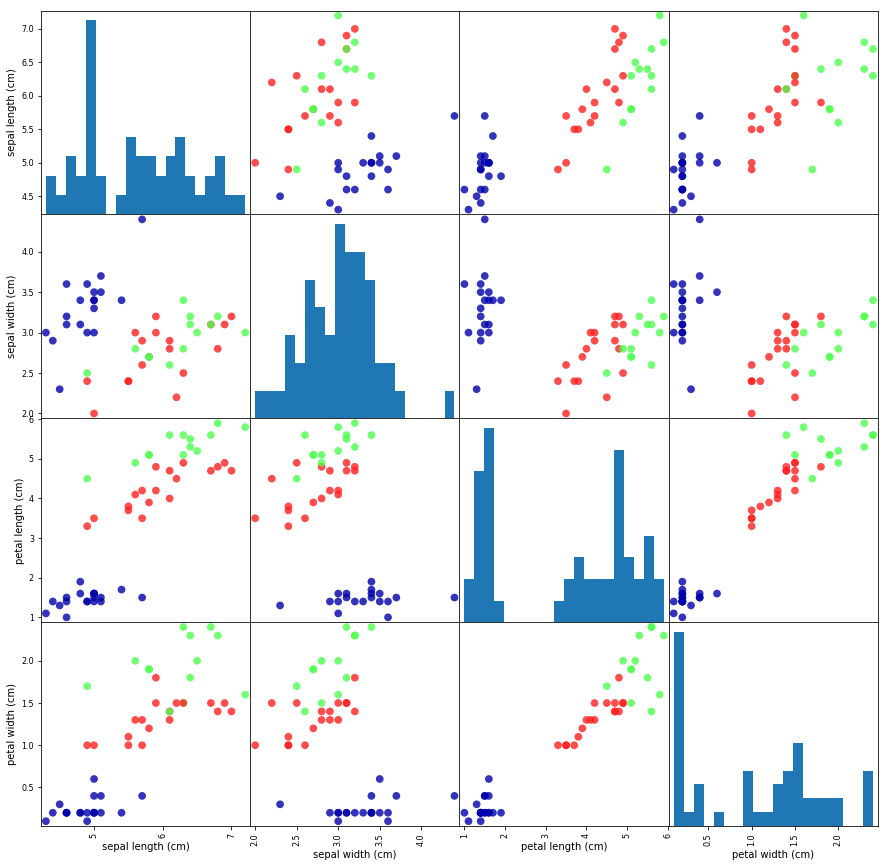

In [52]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train_2, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train_2, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_2, y_train_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [54]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']


# 따로 뽑은 test data

In [55]:
y_pred_2 = knn.predict(X_test_2)
print("테스트 세트에 대한 출력값:\n {}".format(y_test_2))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred_2))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred_2 == y_test_2)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test_2, y_test_2)))

테스트 세트에 대한 출력값:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1]
테스트 세트에 대한 예측값:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 1 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 1 0 0 2 0 1 2 1 1 2 1 0
 1 1 2 1 2 1 0 0 0 2 0 2 2 2 0 0 1 0 2 1 2 2 1 2 2 1]
테스트 세트의 정확도: 0.94
테스트 세트의 정확도: 0.94


# 공통 test data

In [56]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 1 2 1 0
 2]
테스트 세트의 정확도: 0.95
테스트 세트의 정확도: 0.95


# 학습데이터 10 테스트 데이터 140

In [57]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    iris_dataset['data'], iris_dataset['target'], train_size=10, test_size=140, random_state=2)

print("X_train 크기: {}".format(X_train_3.shape))
print("y_train 크기: {}".format(y_train_3.shape))

print("X_test 크기: {}".format(X_test_3.shape))
print("y_test 크기: {}".format(y_test_3.shape))
print(y_test_3)

X_train 크기: (10, 4)
y_train 크기: (10,)
X_test 크기: (140, 4)
y_test 크기: (140,)
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0 2 0 1 0 0 0 2 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1 0 1 0 2 1 1 0
 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0 2 0 0 1 2 1 2
 1 1 2 1 1 1 2 1 2 1 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001473F694DA0>,
      dtype=object)

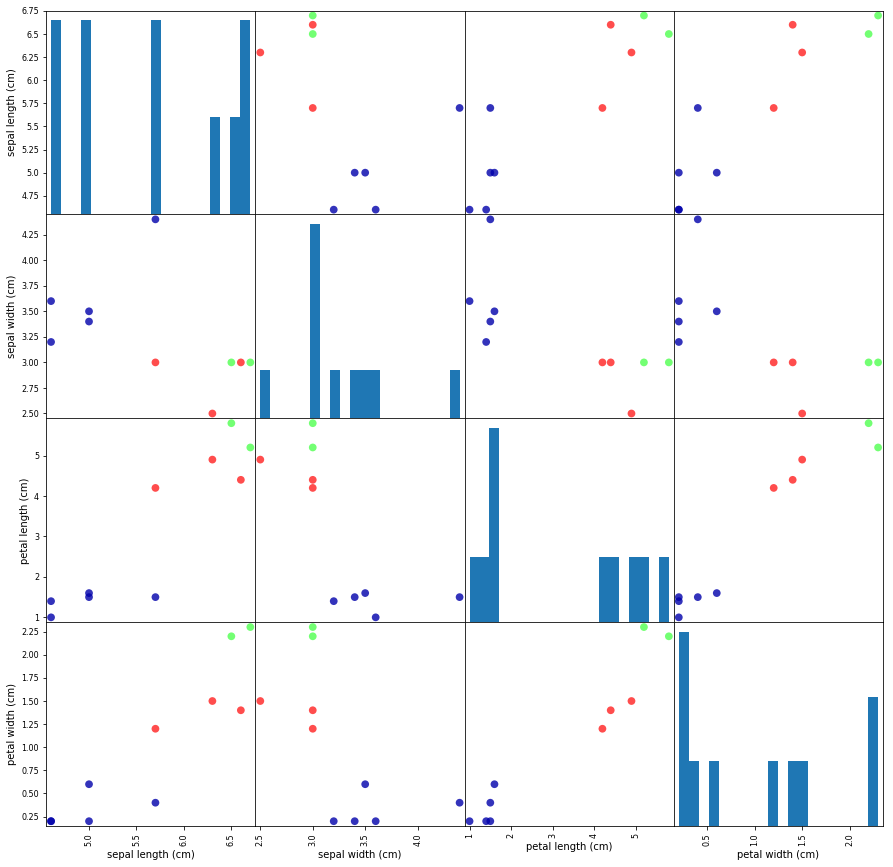

In [58]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train_3, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train_3, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_3, y_train_3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']


# 따로 뽑은 test data

In [61]:
y_pred_3 = knn.predict(X_test_3)
print("테스트 세트에 대한 출력값:\n {}".format(y_test_3))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred_3))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred_3 == y_test_3)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test_3, y_test_3)))

테스트 세트에 대한 출력값:
 [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0 2 0 1 0 0 0 2 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1 0 1 0 2 1 1 0
 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0 2 0 0 1 2 1 2
 1 1 2 1 1 1 2 1 2 1 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1]
테스트 세트에 대한 예측값:
 [0 0 1 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 1 0 2 1 0 1 2 1 0 2
 1 1 2 1 1 2 1 0 1 0 1 0 0 0 1 2 2 0 2 2 2 1 0 0 1 1 1 2 1 1 0 1 0 2 1 1 0
 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 1 2 1 2 1 1 2 0 2 1 2 0 1 0 0 1 2 1 1
 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1]
테스트 세트의 정확도: 0.89
테스트 세트의 정확도: 0.89


# 공통 test data

In [62]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 출력값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1]
테스트 세트의 정확도: 0.89
테스트 세트의 정확도: 0.89
